In [1]:
import pandas as pd
from src import data
import matplotlib.pyplot as plt

In [4]:
import os

print(os.getcwd())

d:\automated_title_abstract_screening\chapters\notebooks\3.4 results\predictions


In [2]:
datasets = data.dict_from_directory('./../../../../data/datasets/05_vocabs')
#del datasets['pancreatic_surgery'] # no predictions for pancreatic surgery so far
predictions = data.dict_from_directory('./')

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: './../../../../data/05_vocabs'

In [ ]:
predictions['pancreatic_surgery'].value_counts('include', normalize=True)

include
True     0.5275
False    0.4725
Name: proportion, dtype: float64

In [ ]:
datasets['pancreatic_surgery'][:800].value_counts('include', normalize=True)

include
False    0.9575
True     0.0425
Name: proportion, dtype: float64

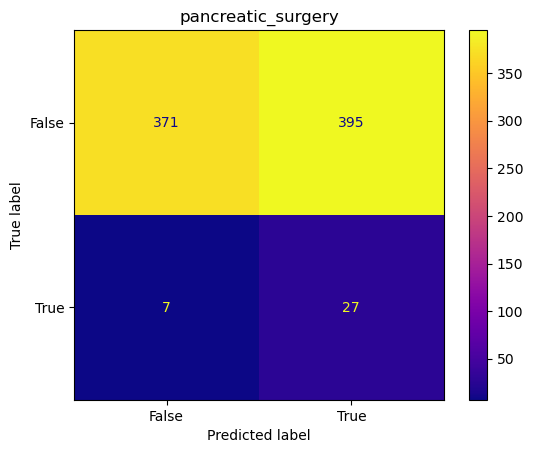

              precision    recall  f1-score   support

         0.0       0.98      0.48      0.65       766
         1.0       0.06      0.79      0.12        34

    accuracy                           0.50       800
   macro avg       0.52      0.64      0.38       800
weighted avg       0.94      0.50      0.63       800

Accuracy: 0.5
F1-score: 0.12
F2-score: 0.24
Specificity / Work Saved Over Sampling: 0.48
ROC AUC: 0.64


: 

In [ ]:
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

subject = 'pancreatic_surgery'

dataset = datasets[subject].iloc[:800]
prediction = predictions[subject]

matrix = confusion_matrix(dataset['include'], prediction['include'], labels=[False, True])
matrix_norm = confusion_matrix(dataset['include'], prediction['include'], labels=[False, True], normalize='true')
tn, fp, fn, tp = matrix.ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[False, True])
disp.plot(cmap='plasma')
plt.title(f'{subject}')
plt.show()

report = classification_report(dataset['include'], prediction['include'])
print(report)

accuracy = accuracy_score(dataset['include'], prediction['include'])
print('Accuracy:', round(accuracy, 2))

f1 = fbeta_score(dataset['include'], prediction['include'], beta=1)
print(f'F1-score: {round(f1, 2)}')

f2 = fbeta_score(dataset['include'], prediction['include'], beta=2)
print(f'F2-score: {round(f2, 2)}')

specificity = tn / (tn + fp)
print(f'Specificity / Work Saved Over Sampling: {round(specificity, 2)}')

roc_auc = roc_auc_score(dataset['include'], prediction['include'])
print(f'ROC AUC: {round(roc_auc, 2)}')

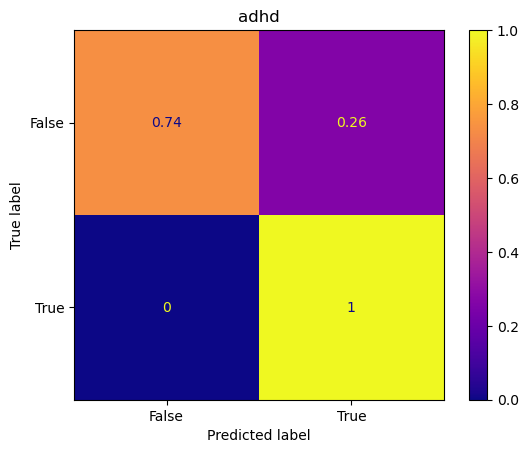

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85       831
         1.0       0.08      1.00      0.16        20

    accuracy                           0.74       851
   macro avg       0.54      0.87      0.50       851
weighted avg       0.98      0.74      0.83       851

Accuracy: 0.74
F1-score: 0.16
F2-score: 0.31
Specificity / Work Saved Over Sampling: 0.74
ROC AUC: 0.87


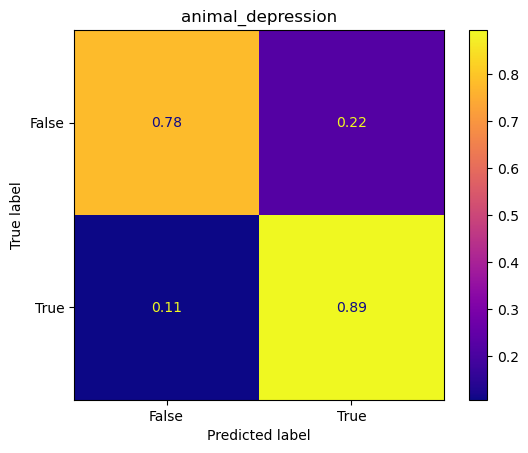

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      1713
         1.0       0.39      0.89      0.55       280

    accuracy                           0.79      1993
   macro avg       0.69      0.83      0.71      1993
weighted avg       0.90      0.79      0.82      1993

Accuracy: 0.79
F1-score: 0.55
F2-score: 0.71
Specificity / Work Saved Over Sampling: 0.78
ROC AUC: 0.83


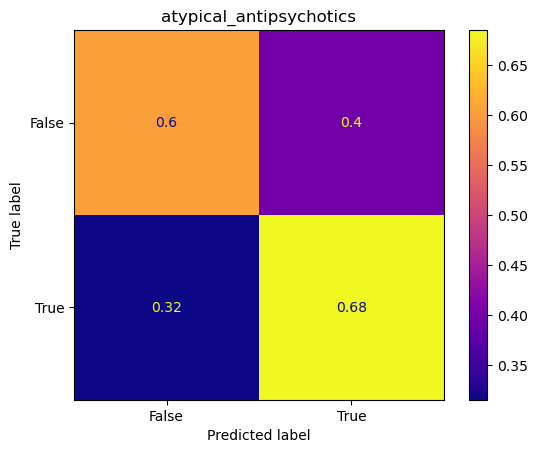

              precision    recall  f1-score   support

         0.0       0.93      0.60      0.73       974
         1.0       0.21      0.68      0.32       146

    accuracy                           0.61      1120
   macro avg       0.57      0.64      0.52      1120
weighted avg       0.83      0.61      0.68      1120

Accuracy: 0.61
F1-score: 0.32
F2-score: 0.47
Specificity / Work Saved Over Sampling: 0.6
ROC AUC: 0.64


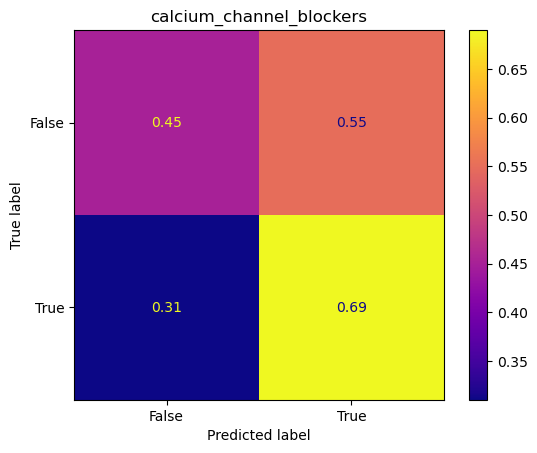

              precision    recall  f1-score   support

         0.0       0.94      0.45      0.61      1118
         1.0       0.10      0.69      0.18       100

    accuracy                           0.47      1218
   macro avg       0.52      0.57      0.39      1218
weighted avg       0.87      0.47      0.57      1218

Accuracy: 0.47
F1-score: 0.18
F2-score: 0.32
Specificity / Work Saved Over Sampling: 0.45
ROC AUC: 0.57


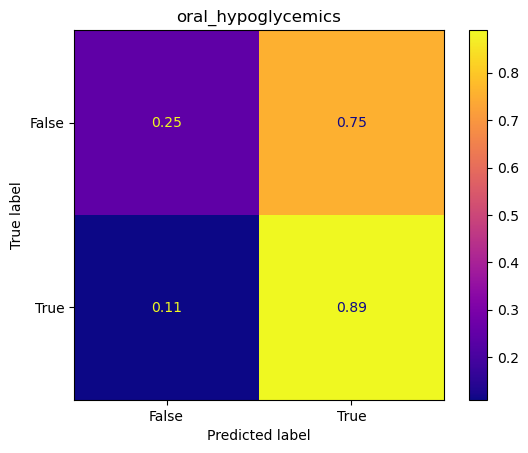

              precision    recall  f1-score   support

         0.0       0.86      0.25      0.38       367
         1.0       0.30      0.89      0.45       136

    accuracy                           0.42       503
   macro avg       0.58      0.57      0.42       503
weighted avg       0.71      0.42      0.40       503

Accuracy: 0.42
F1-score: 0.45
F2-score: 0.64
Specificity / Work Saved Over Sampling: 0.25
ROC AUC: 0.57


In [ ]:
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

def print_results(subject):
    dataset = datasets[subject]
    prediction = predictions[subject]

    matrix = confusion_matrix(dataset['include'], prediction['decision'], labels=[False, True])
    matrix_norm = confusion_matrix(dataset['include'], prediction['decision'], labels=[False, True], normalize='true')
    tn, fp, fn, tp = matrix.ravel()

    disp = ConfusionMatrixDisplay(confusion_matrix=matrix_norm, display_labels=[False, True])
    disp.plot(cmap='plasma')
    plt.title(f'{subject}')
    plt.show()

    report = classification_report(dataset['include'], prediction['decision'])
    print(report)

    accuracy = accuracy_score(dataset['include'], prediction['decision'])
    print('Accuracy:', round(accuracy, 2))

    f1 = fbeta_score(dataset['include'], prediction['decision'], beta=1)
    print(f'F1-score: {round(f1, 2)}')

    f2 = fbeta_score(dataset['include'], prediction['decision'], beta=2)
    print(f'F2-score: {round(f2, 2)}')

    specificity = tn / (tn + fp)
    print(f'Specificity / Work Saved Over Sampling: {round(specificity, 2)}')

    roc_auc = roc_auc_score(dataset['include'], prediction['decision'])
    print(f'ROC AUC: {round(roc_auc, 2)}')

for subject in datasets.keys():
    #print(f'\n{subject}')
    print_results(subject)

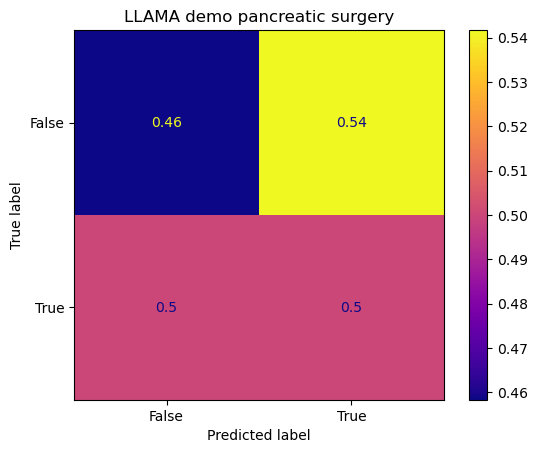

              precision    recall  f1-score   support

       False       0.96      0.46      0.62        96
        True       0.04      0.50      0.07         4

    accuracy                           0.46       100
   macro avg       0.50      0.48      0.34       100
weighted avg       0.92      0.46      0.60       100

Accuracy: 0.46
F1-score: 0.07
F2-score: 0.14
Specificity / Work Saved Over Sampling: 0.46
Cohen's Kappa: -0.01
ROC AUC: 0.48


In [ ]:
from sklearn.metrics import cohen_kappa_score

idx = pd.read_csv('./../../../../data/comparison/demo_truth.csv')['index'].to_list()

pancreatic_surgery = pd.read_csv('./../../../../data/05_vocabs/pancreatic_surgery_vocabs.csv')
dataset = pancreatic_surgery.iloc[idx, :]
prediction = predictions['demo_pancreatic_surgery']

matrix = confusion_matrix(dataset['include'], prediction['decision'], labels=[False, True])
matrix_norm = confusion_matrix(dataset['include'], prediction['decision'], labels=[False, True], normalize='true')
tn, fp, fn, tp = matrix.ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_norm, display_labels=[False, True])
disp.plot(cmap='plasma')
plt.title(f'LLAMA demo pancreatic surgery')
plt.show()

report = classification_report(dataset['include'], prediction['decision'])
print(report)

accuracy = accuracy_score(dataset['include'], prediction['decision'])
print('Accuracy:', round(accuracy, 2))

f1 = fbeta_score(dataset['include'], prediction['decision'], beta=1)
print(f'F1-score: {round(f1, 2)}')

f2 = fbeta_score(dataset['include'], prediction['decision'], beta=2)
print(f'F2-score: {round(f2, 2)}')

specificity = tn / (tn + fp)
print(f'Specificity / Work Saved Over Sampling: {round(specificity, 2)}')

cohen_kappa = cohen_kappa_score(dataset['include'], prediction['decision'])
print(f'Cohen\'s Kappa: {round(cohen_kappa, 2)}')

roc_auc = roc_auc_score(dataset['include'], prediction['decision'])
print(f'ROC AUC: {round(roc_auc, 2)}')

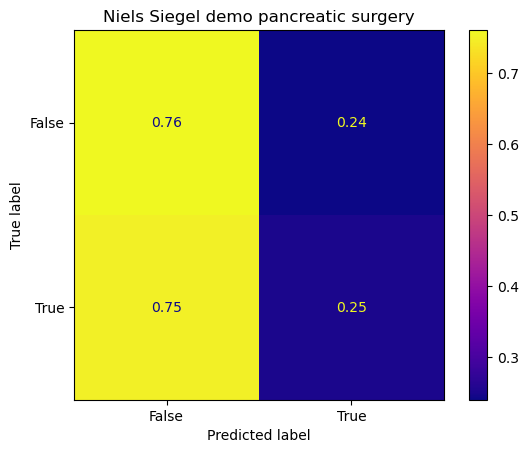

              precision    recall  f1-score   support

       False       0.96      0.76      0.85        96
        True       0.04      0.25      0.07         4

    accuracy                           0.74       100
   macro avg       0.50      0.51      0.46       100
weighted avg       0.92      0.74      0.82       100

Accuracy: 0.74
F1-score: 0.07
F2-score: 0.12
Specificity / Work Saved Over Sampling: 0.76
Cohen's Kappa: 0.0
ROC AUC: 0.51


In [ ]:
idx = pd.read_csv('./../../../../data/comparison/demo_truth.csv')['index'].to_list()

dataset = pancreatic_surgery.iloc[idx, :]
prediction = pd.read_csv('./../../../../data/comparison/siegel.csv')

matrix = confusion_matrix(dataset['include'], prediction['include'], labels=[False, True])
matrix_norm = confusion_matrix(dataset['include'], prediction['include'], labels=[False, True], normalize='true')
tn, fp, fn, tp = matrix.ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_norm, display_labels=[False, True])
disp.plot(cmap='plasma')
plt.title(f'Niels Siegel demo pancreatic surgery')
plt.show()

report = classification_report(dataset['include'], prediction['include'])
print(report)

accuracy = accuracy_score(dataset['include'], prediction['include'])
print('Accuracy:', round(accuracy, 2))

f1 = fbeta_score(dataset['include'], prediction['include'], beta=1)
print(f'F1-score: {round(f1, 2)}')

f2 = fbeta_score(dataset['include'], prediction['include'], beta=2)
print(f'F2-score: {round(f2, 2)}')

specificity = tn / (tn + fp)
print(f'Specificity / Work Saved Over Sampling: {round(specificity, 2)}')

cohen_kappa = cohen_kappa_score(dataset['include'], prediction['include'])
print(f'Cohen\'s Kappa: {round(cohen_kappa, 2)}')

roc_auc = roc_auc_score(dataset['include'], prediction['include'])
print(f'ROC AUC: {round(roc_auc, 2)}')